## Обробка та аналіз біомедичних даних
### БС-24
### Манзик Максим
## Лабораторна робота №3

In [15]:
import pandas as pd

In [16]:
data = pd.read_csv(r"C:\Users\kepkp\PycharmProjects\Study\python_deepdive\tasks\Analytics\LB_3\salaries.csv",
                   encoding='utf-8')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [17]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Візуалізуємо дані

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


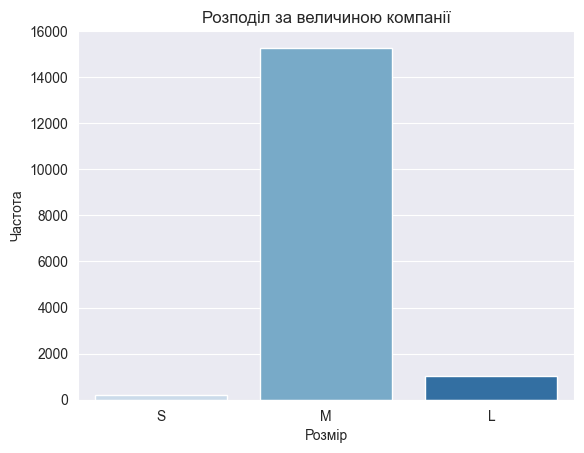

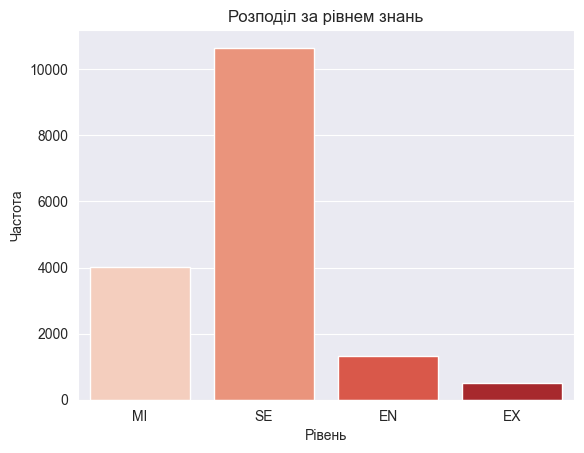

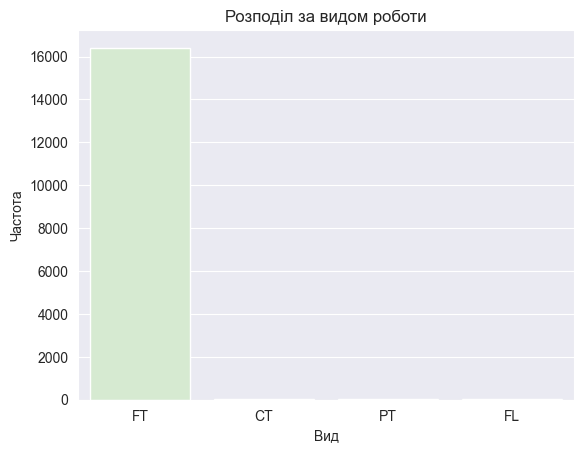

In [19]:
sns.countplot(data=data, x='company_size', hue='company_size', palette='Blues', legend=False)
plt.title('Розподіл за величиною компанії')
plt.xlabel('Розмір')
plt.ylabel('Частота')
plt.show()

sns.countplot(data=data, x='experience_level', hue='experience_level', palette='Reds', legend=False)
plt.title('Розподіл за рівнем знань')
plt.xlabel('Рівень')
plt.ylabel('Частота')
plt.show()

sns.countplot(data=data, x='employment_type', hue='employment_type', palette='Greens', legend=False)
plt.title('Розподіл за видом роботи')
plt.xlabel('Вид')
plt.ylabel('Частота')
plt.show()

## Створимо таблиці спряженості для попарних комбінацій

In [20]:
# Обчислення таблиці спряженості для employment_type та company_size
employment_company_cross_tab = pd.crosstab(index=data['employment_type'], columns=data['company_size'])
employment_company_cross_tab['Всього'] = employment_company_cross_tab.sum(axis=1)
# Обчислення таблиці спряженості для experience_level та company_size
experience_company_cross_tab = pd.crosstab(index=data['experience_level'], columns=data['company_size'])
experience_company_cross_tab['Всього'] = experience_company_cross_tab.sum(axis=1)
# Обчислення таблиці спряженості для experience_level та employment_type
experience_employment_cross_tab = pd.crosstab(index=data['experience_level'], columns=data['employment_type'])
experience_employment_cross_tab['Всього'] = experience_employment_cross_tab.sum(axis=1)
print("Таблиця спряженості для employment_type та company_size:")
print(employment_company_cross_tab)
print("\nТаблиця спряженості для experience_level та company_size:")
print(experience_company_cross_tab)
print("\nТаблиця спряженості для experience_level та employment_type:")
print(experience_employment_cross_tab)

Таблиця спряженості для employment_type та company_size:
company_size        L      M    S  Всього
employment_type                          
CT                  7     12    9      28
FL                  1      6    7      14
FT               1020  15228  166   16414
PT                 10     22    6      38

Таблиця спряженості для experience_level та company_size:
company_size        L      M   S  Всього
experience_level                        
EN                130   1137  52    1319
EX                 23    468   8     499
MI                324   3630  70    4024
SE                561  10033  58   10652

Таблиця спряженості для experience_level та employment_type:
employment_type   CT  FL     FT  PT  Всього
experience_level                           
EN                 7   3   1281  28    1319
EX                 1   0    498   0     499
MI                14   6   3997   7    4024
SE                 6   5  10638   3   10652


### Тепер розрахуємо таблиці з відсотковим розподілом

In [21]:
employment_company_cross_tab_percent = pd.crosstab(index=data['employment_type'], columns=data['company_size'],
                                                   normalize='index') * 100
print("Таблиця спряженості для employment_type та company_size з відсотковим розподілом:")
print(employment_company_cross_tab_percent)
experience_company_cross_tab_percent = pd.crosstab(index=data['experience_level'], columns=data['company_size'],
                                                   normalize='index') * 100
print("\nТаблиця спряженості для experience_level та company_size з відсотковим розподілом:")
print(experience_company_cross_tab_percent)
experience_employment_cross_tab_percent = pd.crosstab(index=data['experience_level'], columns=data['employment_type'],
                                                      normalize='index') * 100
print("\nТаблиця спряженості для experience_level та employment_type з відсотковим розподілом:")
print(experience_employment_cross_tab_percent)


Таблиця спряженості для employment_type та company_size з відсотковим розподілом:
company_size             L          M          S
employment_type                                 
CT               25.000000  42.857143  32.142857
FL                7.142857  42.857143  50.000000
FT                6.214207  92.774461   1.011332
PT               26.315789  57.894737  15.789474

Таблиця спряженості для experience_level та company_size з відсотковим розподілом:
company_size             L          M         S
experience_level                               
EN                9.855951  86.201668  3.942381
EX                4.609218  93.787575  1.603206
MI                8.051690  90.208748  1.739563
SE                5.266617  94.188885  0.544499

Таблиця спряженості для experience_level та employment_type з відсотковим розподілом:
employment_type         CT        FL         FT        PT
experience_level                                         
EN                0.530705  0.227445  97.119030  

## Сформулюємо гіпотези для всіх пар зміних

### Для employment_type та company_size

Нульова гіпотеза (H0): Немає залежності між employment_type та company_size.

Альтернативна гіпотеза (H1): Існує залежність між employment_type та company_size.

### Для experience_level та company_size

Нульова гіпотеза (H0): Немає залежності між experience_level та company_size.

Альтернативна гіпотеза (H1): Існує залежність між experience_level та company_size.

### Для experience_level та employment_type

Нульова гіпотеза (H0): Немає залежності між experience_level та employment_type.

Альтернативна гіпотеза (H1): Існує залежність між experience_level та employment_type.


In [22]:
from scipy.stats import chi2_contingency


def check_hypothesis(table, null_hypothesis, alternative_hypothesis):
    chi2, p, dof, expected = chi2_contingency(table)
    print("Статистика критерію Пірсона (χ²):", chi2)
    print("p-value:", p)

    alpha = 0.05
    if p < alpha:
        print("\nВідхиляємо нульову гіпотезу.")
        print(alternative_hypothesis)
    else:
        print("\nНе відхиляємо нульову гіпотезу.")
        print(null_hypothesis)


print("Перевірка гіпотези для employment_type та company_size:")
check_hypothesis(employment_company_cross_tab, "Немає залежності між employment_type та company_size.",
                 "Існує залежність між employment_type та company_size.")

print("\nПеревірка гіпотези для experience_level та company_size:")
check_hypothesis(experience_company_cross_tab, "Немає залежності між experience_level та company_size.",
                 "Існує залежність між experience_level та company_size.")

print("\nПеревірка гіпотези для experience_level та employment_type:")
check_hypothesis(experience_employment_cross_tab, "Немає залежності між experience_level та employment_type.",
                 "Існує залежність між experience_level та employment_type.")


Перевірка гіпотези для employment_type та company_size:
Статистика критерію Пірсона (χ²): 659.4561195613572
p-value: 3.576390476295275e-136

Відхиляємо нульову гіпотезу.
Існує залежність між employment_type та company_size.

Перевірка гіпотези для experience_level та company_size:
Статистика критерію Пірсона (χ²): 215.4125149434501
p-value: 1.9283044773059145e-41

Відхиляємо нульову гіпотезу.
Існує залежність між experience_level та company_size.

Перевірка гіпотези для experience_level та employment_type:
Статистика критерію Пірсона (χ²): 259.6526495690167
p-value: 1.323413660605993e-48

Відхиляємо нульову гіпотезу.
Існує залежність між experience_level та employment_type.
